<a href="https://colab.research.google.com/github/Dumbie2199/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Create an empty df to store the datasets
marketing_df = pd.DataFrame()

# store the data into the empty df
marketing_df = pd.read_csv("marketing_campaign.csv",sep='\t')

# check data type, look for na values and number of column
marketing_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Please upload your CSV file to the Colab environment using the folder icon in the left sidebar. Once uploaded, you can load it using the following code, replacing `'your_file_name.csv'` with the actual name of your file.

In [3]:
# Look for the dtypes
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
# Look for any NaN
marketing_df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [5]:
# Change to datetime format
marketing_df['Dt_Customer'] = pd.to_datetime(marketing_df['Dt_Customer'], format='%d-%m-%Y')
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [6]:
# Remove useless info
marketing_df = marketing_df.drop(columns=['Z_CostContact', 'Z_Revenue'])
marketing_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0


In [7]:
marketing_df.nunique()

,0
ID,2240
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776


In [8]:
# Select only numerical columns for outlier detection
numerical_cols = marketing_df.select_dtypes(include = np.number)
numerical_cols.drop(columns=['ID'], inplace=True)
numerical_cols

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,58138.0,0,0,58,635,88,546,172,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,46344.0,1,1,38,11,1,6,2,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,2,10,4,0,0,0,0,0,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,4,6,0,0,0,0,0,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,...,3,4,5,0,0,0,0,0,0,0
2236,1946,64014.0,2,1,56,406,0,30,0,0,...,2,5,7,0,0,0,1,0,0,0
2237,1981,56981.0,0,0,91,908,48,217,32,12,...,3,13,6,0,1,0,0,0,0,0
2238,1956,69245.0,0,1,8,428,30,214,80,30,...,5,10,3,0,0,0,0,0,0,0


In [9]:
# Binary numerical columns = only values {0,1}
bin_df = numerical_cols.loc[:,
    numerical_cols.apply(lambda col: col.dropna().isin([0, 1]).all())
]

# Non-binary numerical columns = everything else
non_bin_df = numerical_cols.loc[:,
    ~numerical_cols.columns.isin(bin_df.columns)
]


In [10]:
bin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   AcceptedCmp3  2240 non-null   int64
 1   AcceptedCmp4  2240 non-null   int64
 2   AcceptedCmp5  2240 non-null   int64
 3   AcceptedCmp1  2240 non-null   int64
 4   AcceptedCmp2  2240 non-null   int64
 5   Complain      2240 non-null   int64
 6   Response      2240 non-null   int64
dtypes: int64(7)
memory usage: 122.6 KB


In [11]:
bin_df_clean = bin_df.astype(int)
bin_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   AcceptedCmp3  2240 non-null   int64
 1   AcceptedCmp4  2240 non-null   int64
 2   AcceptedCmp5  2240 non-null   int64
 3   AcceptedCmp1  2240 non-null   int64
 4   AcceptedCmp2  2240 non-null   int64
 5   Complain      2240 non-null   int64
 6   Response      2240 non-null   int64
dtypes: int64(7)
memory usage: 122.6 KB


In [12]:
non_bin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Income               2216 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   Recency              2240 non-null   int64  
 5   MntWines             2240 non-null   int64  
 6   MntFruits            2240 non-null   int64  
 7   MntMeatProducts      2240 non-null   int64  
 8   MntFishProducts      2240 non-null   int64  
 9   MntSweetProducts     2240 non-null   int64  
 10  MntGoldProds         2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

Box Plot

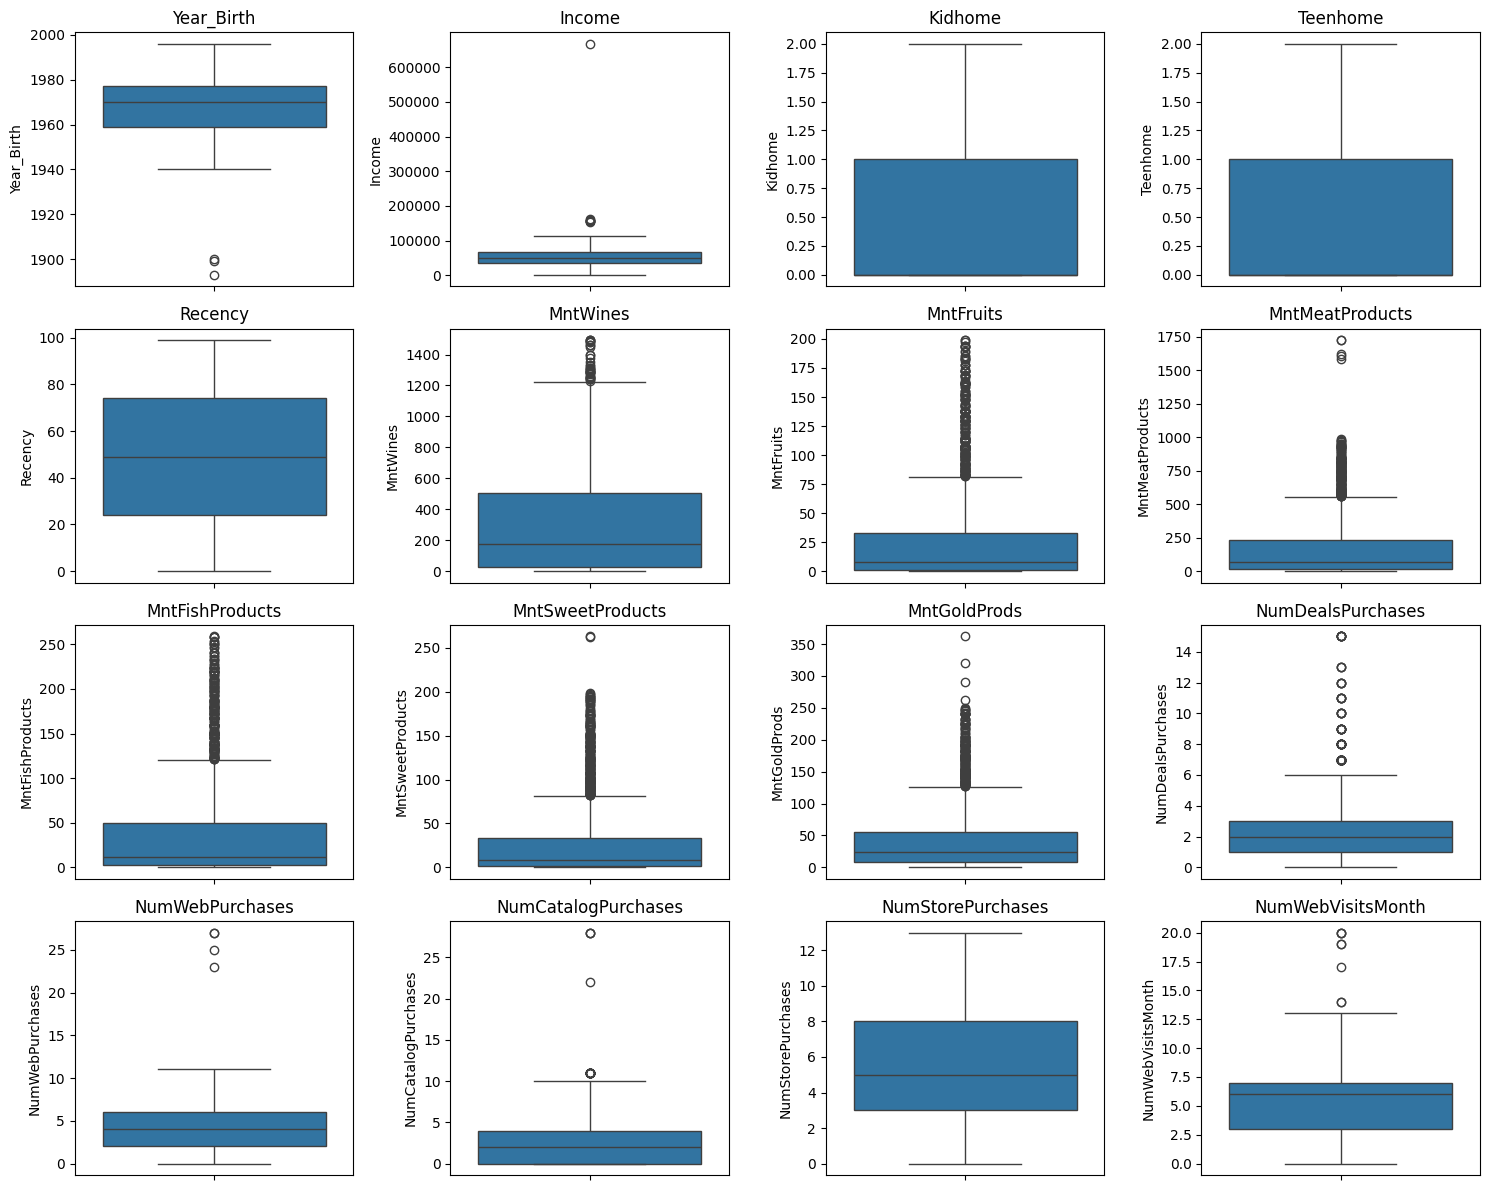

In [13]:
plt.figure(figsize = (15, 12))

# Create subplots for each numerical feature
for i, feature in enumerate(non_bin_df.columns, 1):  # Loop through all columns in df_num
    plt.subplot(4, 4, i)  # Adjust rows/cols based on the number of features
    sns.boxplot(y = non_bin_df[feature])
    plt.title(feature)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Distribution Plot

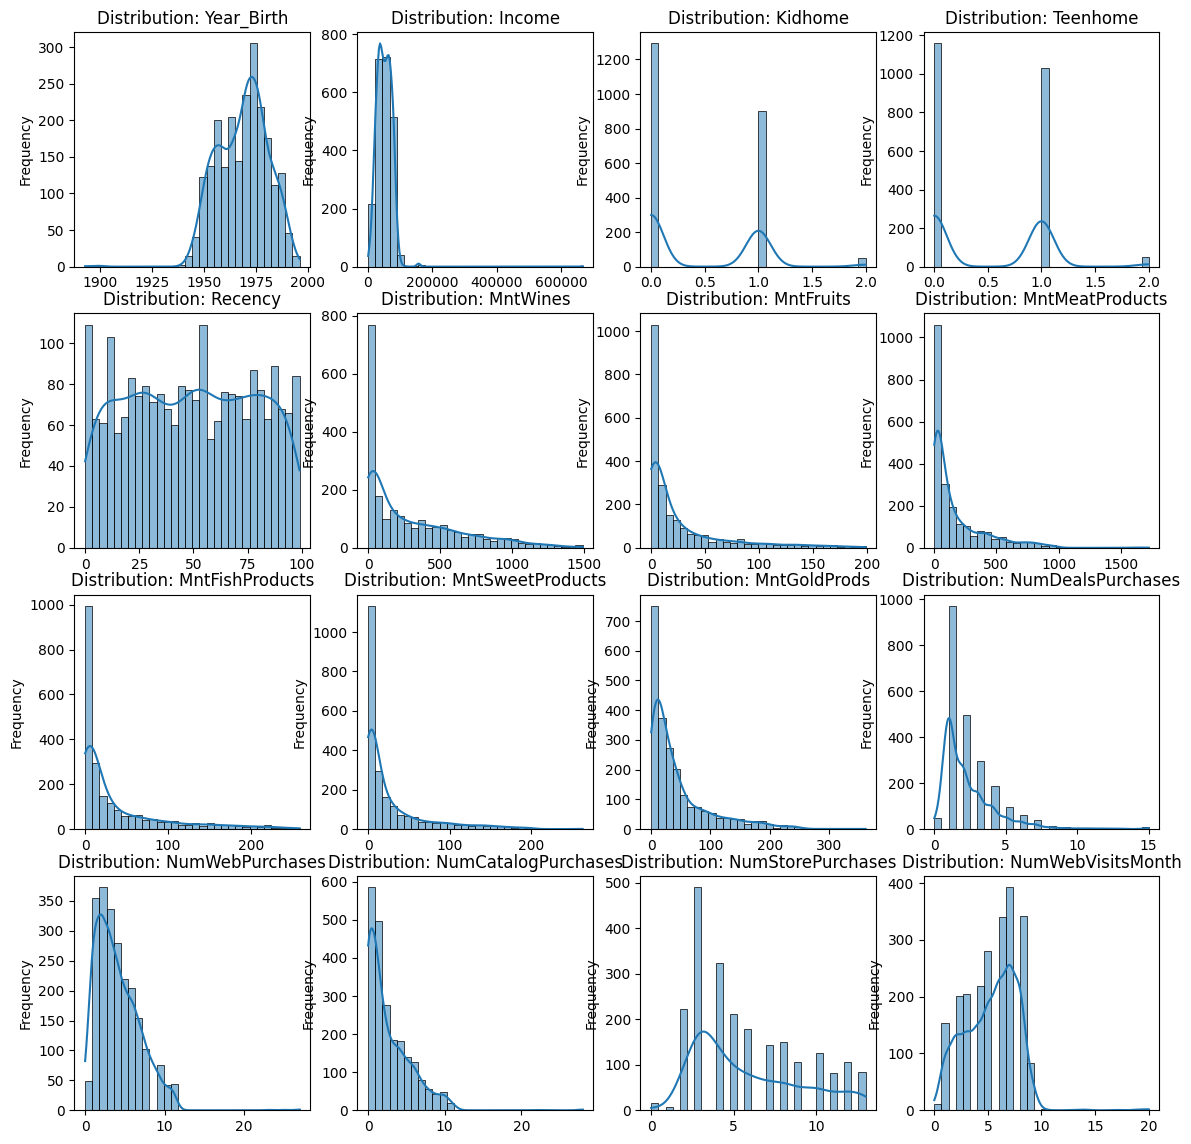

In [14]:
# Distribution plots
fig, axes = plt.subplots(4, 4, figsize = (14, 14))

axes = axes.flatten()

for i, col in enumerate(non_bin_df):
    sns.histplot(non_bin_df[col], kde = True, ax = axes[i], bins = 30)
    axes[i].set_title(f'Distribution: {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

Correlation Matrix

In [15]:
nonbin_corr = non_bin_df.corr().round(3)
nonbin_corr

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Year_Birth,1.000,-0.162,0.230,-0.352,-0.020,-0.158,-0.018,-0.031,-0.042,-0.018,-0.062,-0.061,-0.145,-0.121,-0.128,0.121
Income,-0.162,1.000,-0.429,0.019,-0.004,0.579,0.431,0.585,0.439,0.441,0.326,-0.083,0.388,0.589,0.529,-0.553
Kidhome,0.230,-0.429,1.000,-0.036,0.009,-0.496,-0.373,-0.437,-0.388,-0.371,-0.350,0.222,-0.362,-0.502,-0.500,0.448
Teenhome,-0.352,0.019,-0.036,1.000,0.016,0.005,-0.177,-0.261,-0.204,-0.162,-0.022,0.388,0.155,-0.111,0.051,0.135
Recency,-0.020,-0.004,0.009,0.016,1.000,0.016,-0.004,0.023,0.001,0.023,0.017,-0.001,-0.011,0.025,0.001,-0.021
MntWines,-0.158,0.579,-0.496,0.005,0.016,1.000,0.390,0.563,0.400,0.387,0.388,0.011,0.542,0.635,0.642,-0.321
MntFruits,-0.018,0.431,-0.373,-0.177,-0.004,0.390,1.000,0.543,0.595,0.567,0.393,-0.132,0.297,0.488,0.462,-0.418
MntMeatProducts,-0.031,0.585,-0.437,-0.261,0.023,0.563,0.543,1.000,0.568,0.524,0.351,-0.122,0.294,0.724,0.480,-0.539
MntFishProducts,-0.042,0.439,-0.388,-0.204,0.001,0.400,0.595,0.568,1.000,0.580,0.423,-0.139,0.294,0.534,0.460,-0.446
MntSweetProducts,-0.018,0.441,-0.371,-0.162,0.023,0.387,0.567,0.524,0.580,1.000,0.370,-0.120,0.349,0.491,0.449,-0.423


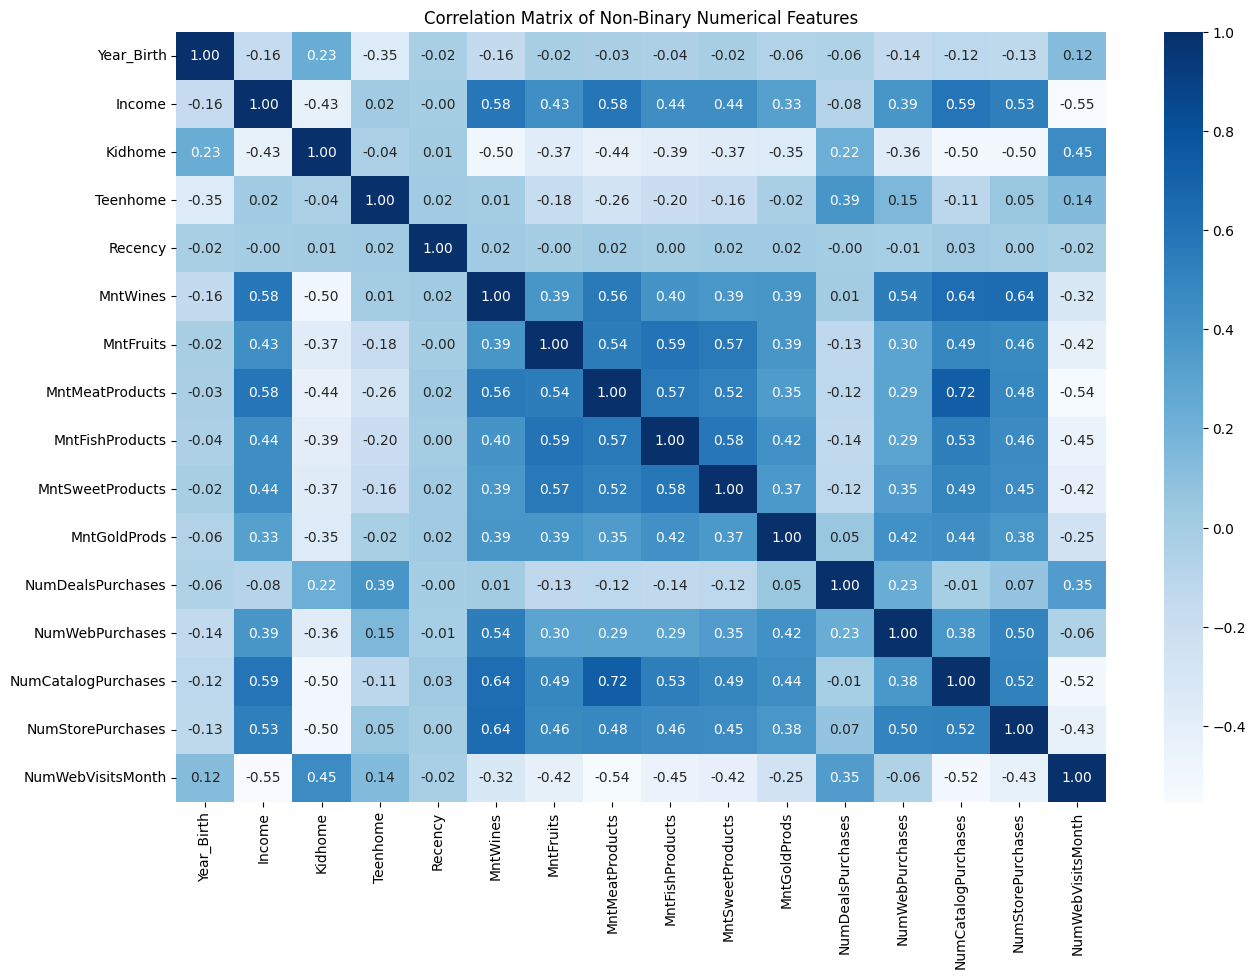

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(nonbin_corr, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix of Non-Binary Numerical Features')
plt.show()

In [17]:
categorical_cols = marketing_df.select_dtypes(include='object')
categorical_cols

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
...,...,...
2235,Graduation,Married
2236,PhD,Together
2237,Graduation,Divorced
2238,Master,Together


In [18]:
ordinal_cols = categorical_cols['Education']
nominal_cols = categorical_cols.drop(columns=['Education'])

In [19]:
marketing_clean = pd.concat([bin_df_clean, non_bin_df, ordinal_cols, nominal_cols], axis=1)
marketing_clean

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year_Birth,Income,Kidhome,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Education,Marital_Status
0,0,0,0,0,0,0,1,1957,58138.0,0,...,172,88,88,3,8,10,4,7,Graduation,Single
1,0,0,0,0,0,0,0,1954,46344.0,1,...,2,1,6,2,1,1,2,5,Graduation,Single
2,0,0,0,0,0,0,0,1965,71613.0,0,...,111,21,42,1,8,2,10,4,Graduation,Together
3,0,0,0,0,0,0,0,1984,26646.0,1,...,10,3,5,2,2,0,4,6,Graduation,Together
4,0,0,0,0,0,0,0,1981,58293.0,1,...,46,27,15,5,5,3,6,5,PhD,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,0,0,0,0,0,0,1967,61223.0,0,...,42,118,247,2,9,3,4,5,Graduation,Married
2236,0,0,0,1,0,0,0,1946,64014.0,2,...,0,0,8,7,8,2,5,7,PhD,Together
2237,0,1,0,0,0,0,0,1981,56981.0,0,...,32,12,24,1,2,3,13,6,Graduation,Divorced
2238,0,0,0,0,0,0,0,1956,69245.0,0,...,80,30,61,2,6,5,10,3,Master,Together


In [20]:
# Convert them to list so i can perform column transformer
bin_features = bin_df.columns.tolist()
non_bin_features = non_bin_df.columns.tolist()
ordinal_features = [ordinal_cols.name]
nominal_features = nominal_cols.columns.tolist()

print(bin_features)
print(non_bin_features)
print(ordinal_features)
print(nominal_features)

['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
['Education']
['Marital_Status']


In [21]:
preprocessor = ColumnTransformer(
    transformers=[

        # Numerical (mean imputation + scaling)
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="mean")),
            ("scaler", StandardScaler())
        ]), non_bin_features),

        # Ordinal (most frequent + encoding + scaling)
        ("ord", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OrdinalEncoder()),
            ("scaler", StandardScaler())
        ]), ordinal_features),

        # Binary (most frequent)
        ("bin", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent"))
        ]), bin_features),

        # Nominal (most frequent + one-hot)
        ("nom", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(drop="first", sparse_output=False))
        ]), nominal_features)

    ],
    remainder="drop"
)


In [22]:
x_processed = preprocessor.fit_transform(marketing_clean)
x_processed

array([[-0.98534473,  0.23532677, -0.82521765, ...,  0.        ,
         0.        ,  0.        ],
       [-1.23573295, -0.23582624,  1.03255877, ...,  0.        ,
         0.        ,  0.        ],
       [-0.3176428 ,  0.77363327, -0.82521765, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.01776106,  0.18910632, -0.82521765, ...,  0.        ,
         0.        ,  0.        ],
       [-1.06880747,  0.67903514, -0.82521765, ...,  1.        ,
         0.        ,  0.        ],
       [-1.23573295,  0.02483795,  1.03255877, ...,  0.        ,
         0.        ,  0.        ]])

In [23]:
feature_names = preprocessor.get_feature_names_out()

x_processed_df = pd.DataFrame(
    x_processed,
    columns=feature_names,
    index=marketing_clean.index
)


In [24]:
# Pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA())
])

In [25]:
# Fit
x_pca = pipeline.fit_transform(x_processed_df)


In [26]:
explained_variance = pipeline.named_steps["pca"].explained_variance_ratio_

cumulative_explained_variance = np.cumsum(explained_variance)

cum_variance_df = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(explained_variance))],
    "Explained Variance Ratio": explained_variance,
    "Cumulative Explained Variance": cumulative_explained_variance
})

cum_variance_df


,PC,Explained Variance Ratio,Cumulative Explained Variance
0,PC1,0.210413,0.210413
1,PC2,0.068761,0.279174
2,PC3,0.062060,0.341233
3,PC4,0.049308,0.390542
4,PC5,0.047586,0.438127
5,PC6,0.041812,0.479940
6,PC7,0.038847,0.518787
7,PC8,0.036845,0.555631
8,PC9,0.034431,0.590062
9,PC10,0.033539,0.623601


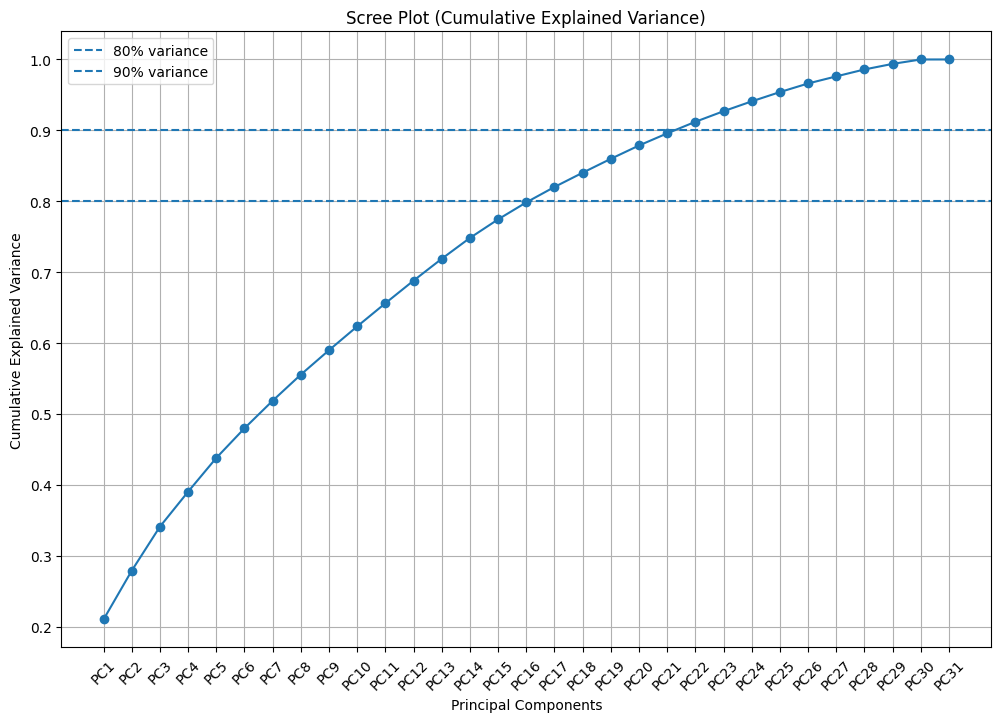

In [27]:
plt.figure(figsize=(12, 8))
plt.plot(
    cum_variance_df["PC"],
    cum_variance_df["Cumulative Explained Variance"],
    marker="o"
)

plt.axhline(y=0.8, linestyle="--", label="80% variance")
plt.axhline(y=0.9, linestyle="--", label="90% variance")

plt.xlabel("Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot (Cumulative Explained Variance)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [28]:
pca = PCA(n_components = 22, random_state=42)
x_pca = pca.fit_transform(x_processed)

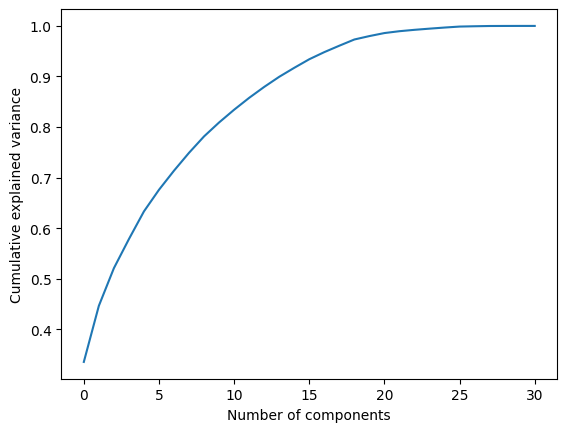

In [29]:
pca_full = PCA()
pca_full.fit(x_processed)

plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

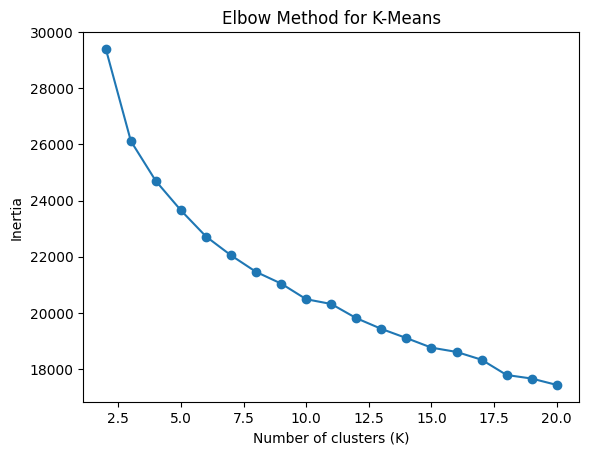

In [30]:
inertia = []

K_range = range(2, 21)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x_pca)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.show()

In [31]:
# Silhouette Score for K-means
num_kcluster = []
Ksilscore = []
for k in range(2, 11):  # Start from 2 because Silhouette requires at least 2 clusters
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(x_pca)
    kscore = silhouette_score(x_pca, kmeans.labels_)
    num_kcluster.append(k)
    Ksilscore.append(kscore)

ksilscore_df = pd.DataFrame({'Number of Clusters': num_kcluster, 'Silhouette Score': Ksilscore})
ksilscore_df

,Number of Clusters,Silhouette Score
0,2,0.269229
1,3,0.197879
2,4,0.177702
3,5,0.127128
4,6,0.115206
5,7,0.116371
6,8,0.116054
7,9,0.116658
8,10,0.117351


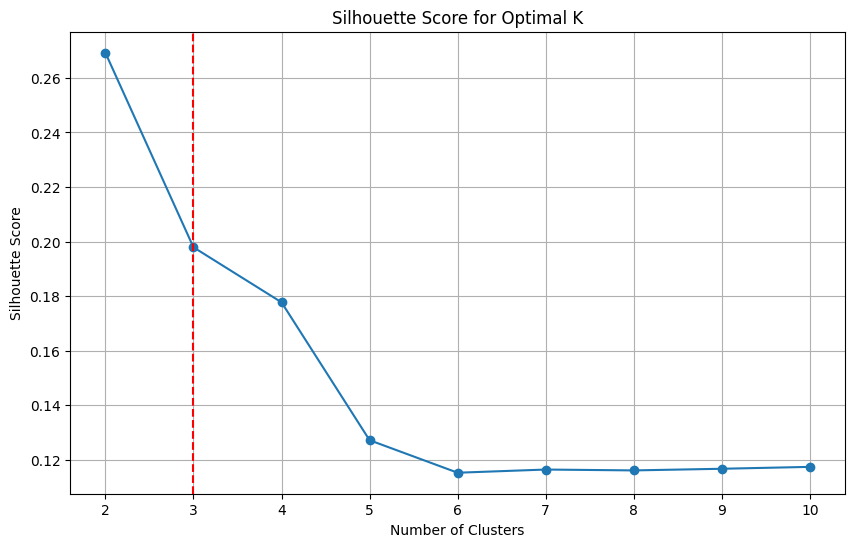

In [32]:
# Plot the silhouette score for K-means
plt.figure(figsize = (10, 6))
plt.plot(num_kcluster, Ksilscore, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.axvline(x = 3, color = 'red', linestyle = '--')  # easier to visualise why 3 clusters were chosen

plt.grid(True)
plt.show()

In [33]:
kmeans = KMeans(
    n_clusters=3,
    random_state=42,
    n_init=10 # need to include this
)

marketing_clean["cluster"] = kmeans.fit_predict(x_pca)

In [34]:
marketing_clean

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year_Birth,Income,Kidhome,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Education,Marital_Status,cluster
0,0,0,0,0,0,0,1,1957,58138.0,0,...,88,88,3,8,10,4,7,Graduation,Single,2
1,0,0,0,0,0,0,0,1954,46344.0,1,...,1,6,2,1,1,2,5,Graduation,Single,0
2,0,0,0,0,0,0,0,1965,71613.0,0,...,21,42,1,8,2,10,4,Graduation,Together,2
3,0,0,0,0,0,0,0,1984,26646.0,1,...,3,5,2,2,0,4,6,Graduation,Together,0
4,0,0,0,0,0,0,0,1981,58293.0,1,...,27,15,5,5,3,6,5,PhD,Married,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,0,0,0,0,0,0,1967,61223.0,0,...,118,247,2,9,3,4,5,Graduation,Married,1
2236,0,0,0,1,0,0,0,1946,64014.0,2,...,0,8,7,8,2,5,7,PhD,Together,1
2237,0,1,0,0,0,0,0,1981,56981.0,0,...,12,24,1,2,3,13,6,Graduation,Divorced,2
2238,0,0,0,0,0,0,0,1956,69245.0,0,...,30,61,2,6,5,10,3,Master,Together,1


In [35]:
marketing_clean.groupby("cluster")[numerical_cols.columns].mean()


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
cluster,,,,,,,,,,,,,,,,,,,,,
0,1971.763029,34426.935388,0.805310,0.429695,49.054081,39.190757,4.881023,22.732547,7.362832,5.008850,...,0.525074,3.169125,6.503441,0.073746,0.010816,0.000000,0.000983,0.001967,0.012783,0.093412
1,1964.452381,57914.073955,0.234921,0.944444,48.773016,460.720635,20.468254,131.430159,27.614286,21.023810,...,3.014286,7.577778,5.730159,0.063492,0.138095,0.025397,0.036508,0.019048,0.006349,0.120635
2,1968.359191,76741.255102,0.047218,0.172007,49.561551,591.408094,69.237774,452.020236,99.784148,71.301855,...,5.952782,8.386172,2.841484,0.080944,0.116358,0.247892,0.202361,0.026981,0.006745,0.274874


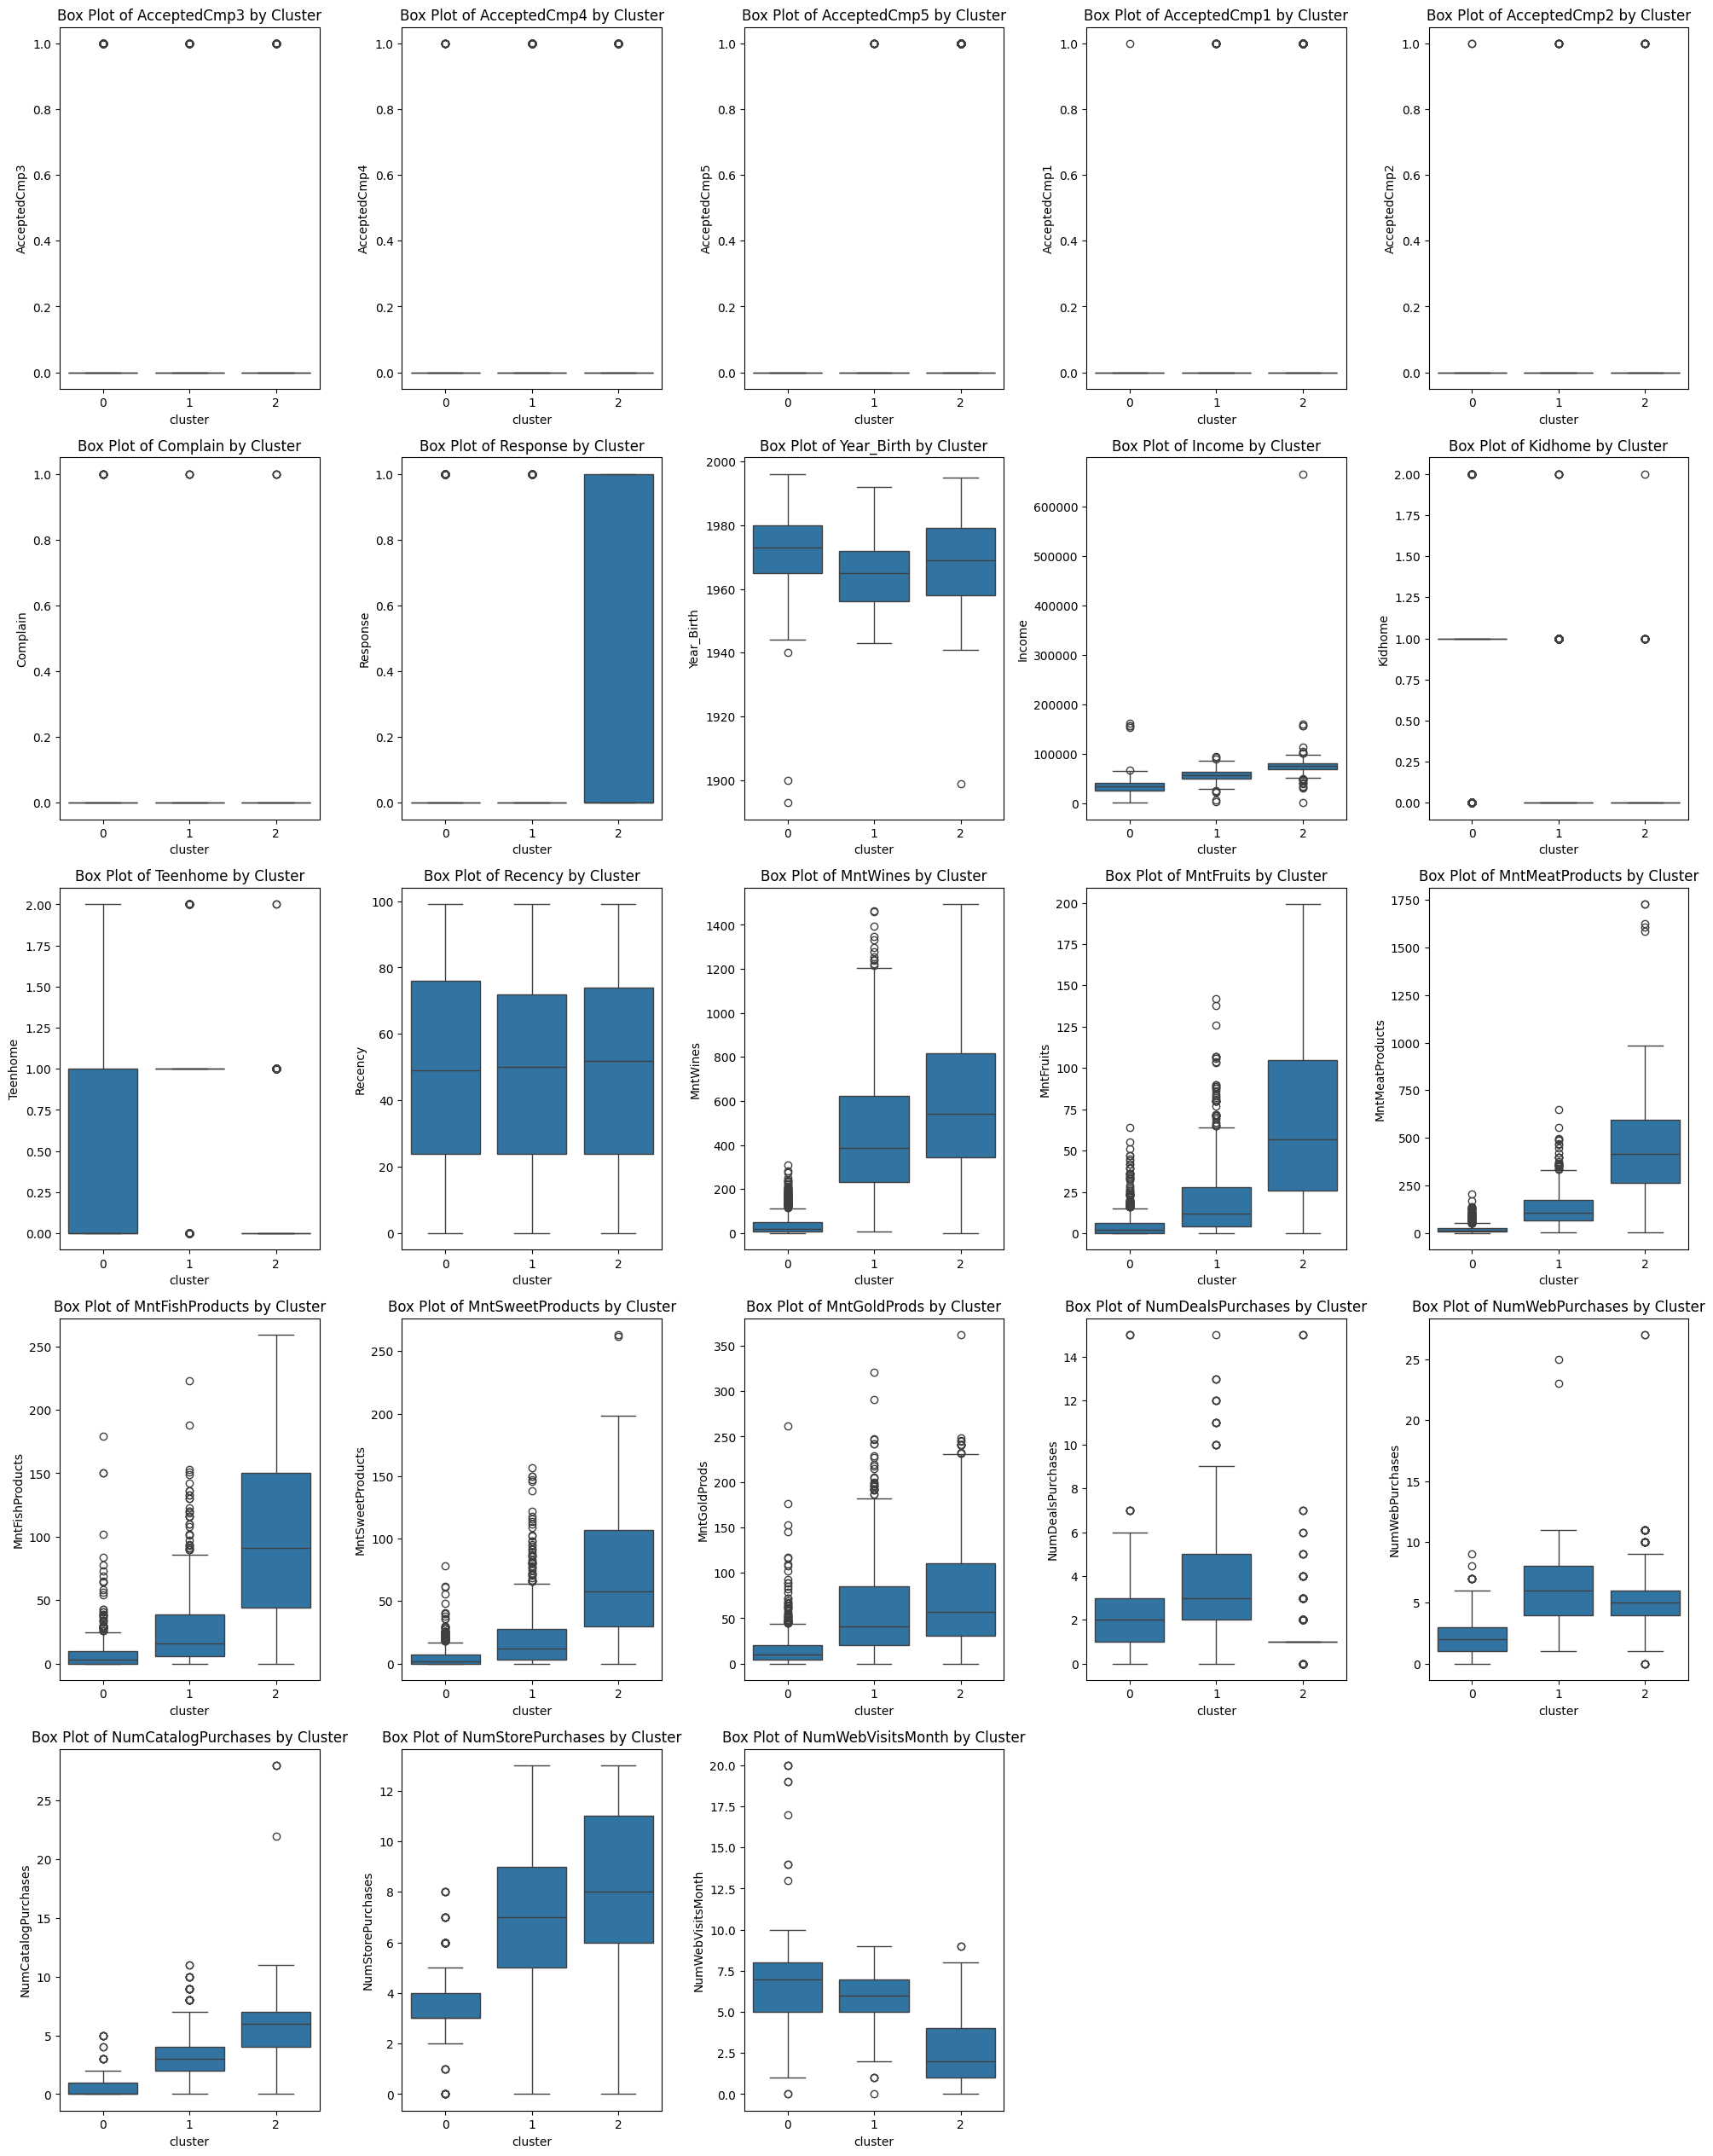

In [36]:
numerical_cols_clean = marketing_clean.select_dtypes(include=np.number).columns.drop('cluster')

plt.figure(figsize=(20, 30))
for i, feature in enumerate(numerical_cols_clean, 1):
    plt.subplot(6, 5, i)  # Adjust subplot grid as needed
    sns.boxplot(x='cluster', y=feature, data=marketing_clean)
    plt.title(f'Box Plot of {feature} by Cluster')

plt.tight_layout()
plt.show()

In [37]:
pd.crosstab(marketing_clean["cluster"], marketing_clean["Education"], normalize="index")

Education,2n Cycle,Basic,Graduation,Master,PhD
cluster,,,,,
0,0.111111,0.051131,0.495575,0.157325,0.184857
1,0.052381,0.001587,0.457143,0.203175,0.285714
2,0.096121,0.001686,0.564924,0.138280,0.198988


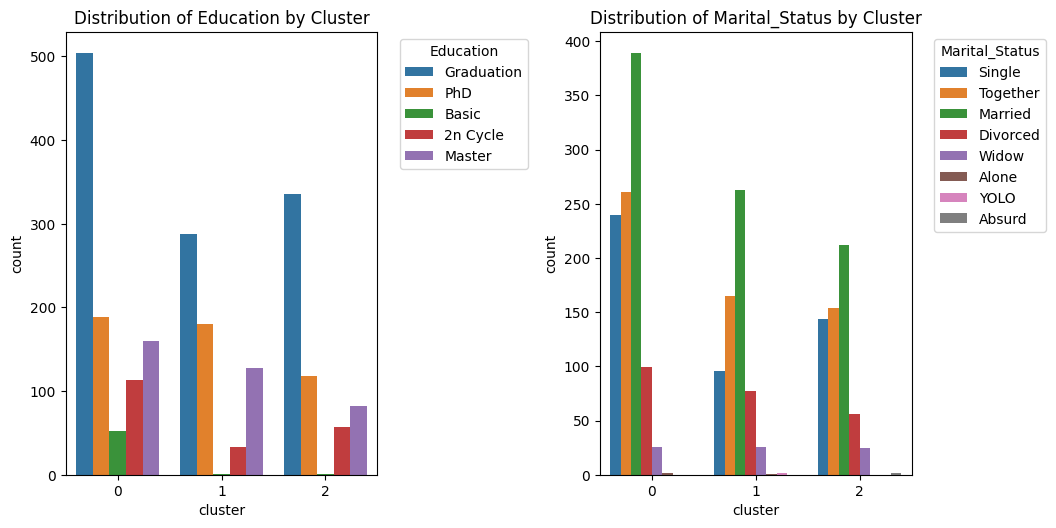

In [38]:
plt.figure(figsize=(20, 30))

for i, feature in enumerate(categorical_cols, 1):
    plt.subplot(6, 4, i)
    sns.countplot(
        data=marketing_clean,
        x="cluster",
        hue=feature
    )
    plt.title(f"Distribution of {feature} by Cluster")
    plt.legend(title=feature, bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

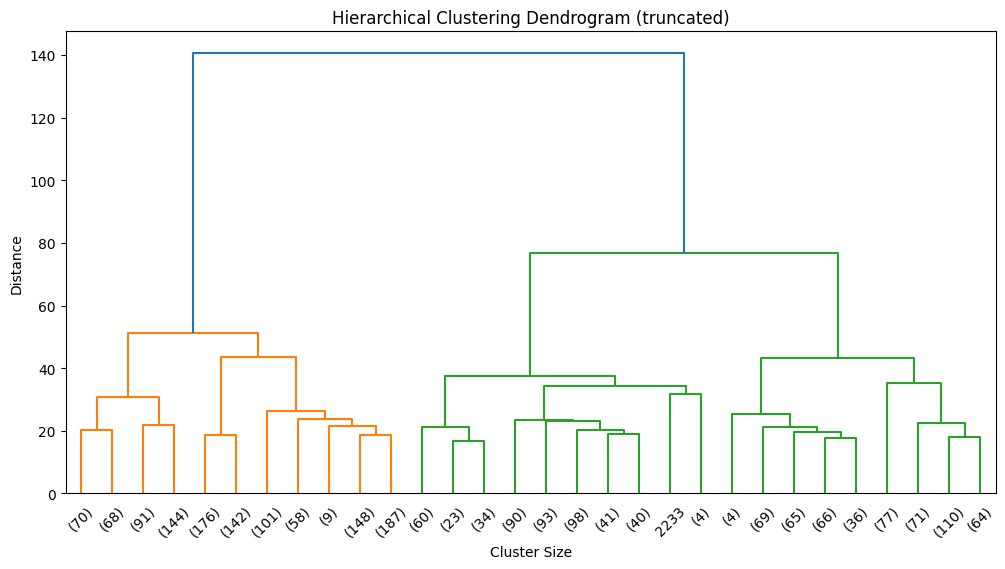

In [39]:
# HAC

# Use Ward linkage (best for Euclidean distance)
Z = linkage(x_pca, method="ward")

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode="lastp", p=30)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()


In [40]:
from sklearn.cluster import AgglomerativeClustering

hac = AgglomerativeClustering(
    n_clusters=3,
    linkage="ward"
)

hac_labels = hac.fit_predict(x_pca)

marketing_clean["HAC_cluster"] = hac_labels

In [41]:
marketing_clean["HAC_cluster"].value_counts(normalize=True)

,proportion
HAC_cluster,
0,0.533036
1,0.250893
2,0.216071


In [42]:
marketing_clean["cluster"].value_counts(normalize=True)

,proportion
cluster,
0,0.454018
1,0.281250
2,0.264732


In [43]:
marketing_clean.groupby("HAC_cluster")[numerical_cols_clean].mean()

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year_Birth,Income,Kidhome,...,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
HAC_cluster,,,,,,,,,,,,,,,,,,,,,
0,0.072027,0.024288,0.000000,0.005025,0.002513,0.011725,0.095477,1970.619765,37192.467797,0.715243,...,6.504188,32.258794,8.716080,5.975712,18.959799,2.201005,2.569514,0.744556,3.624791,6.371859
1,0.065836,0.140569,0.044484,0.055160,0.023132,0.007117,0.149466,1964.921708,61717.384892,0.225979,...,34.202847,175.905694,48.733096,37.898577,72.081851,3.588968,6.722420,3.709964,8.302491,5.469751
2,0.082645,0.121901,0.285124,0.221074,0.028926,0.006198,0.280992,1968.840909,78287.356250,0.028926,...,65.969008,488.826446,95.582645,66.502066,73.266529,1.163223,4.760331,6.175620,8.214876,2.535124


In [44]:
pd.crosstab(
    marketing_clean["HAC_cluster"],
    marketing_clean["Education"],
    normalize="index"
)

Education,2n Cycle,Basic,Graduation,Master,PhD
HAC_cluster,,,,,
0,0.101340,0.043551,0.488275,0.169179,0.197655
1,0.072954,0.001779,0.516014,0.151246,0.258007
2,0.084711,0.002066,0.524793,0.171488,0.216942


In [45]:
num_hcluster = []
Hsilscore = []

for k in range(2, 11):  # Silhouette requires at least 2 clusters
    hac = AgglomerativeClustering(
        n_clusters=k,
        linkage='ward'   # ward is appropriate since PCA data is scaled
    )

    labels = hac.fit_predict(x_pca)
    hscore = silhouette_score(x_pca, labels)

    num_hcluster.append(k)
    Hsilscore.append(hscore)

hsilscore_df = pd.DataFrame({
    'Number of Clusters': num_hcluster,
    'Silhouette Score': Hsilscore
})

hsilscore_df


,Number of Clusters,Silhouette Score
0,2,0.239943
1,3,0.207304
2,4,0.107313
3,5,0.089378
4,6,0.085376
5,7,0.085506
6,8,0.086965
7,9,0.089690
8,10,0.090328


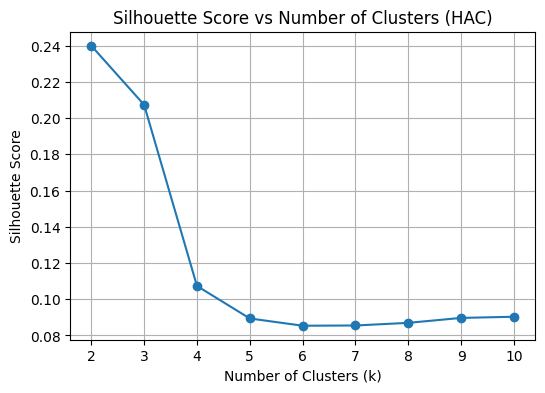

In [46]:
plt.figure( figsize=(6, 4))
plt.plot(num_hcluster, Hsilscore, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters (HAC)")
plt.grid(True)
plt.show()


np.float64(0.20730365402226528)

In [48]:
marketing_clean['cluster'].value_counts()

,count
cluster,
0,1017
1,630
2,593


/tmp/ipython-input-1246012113.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


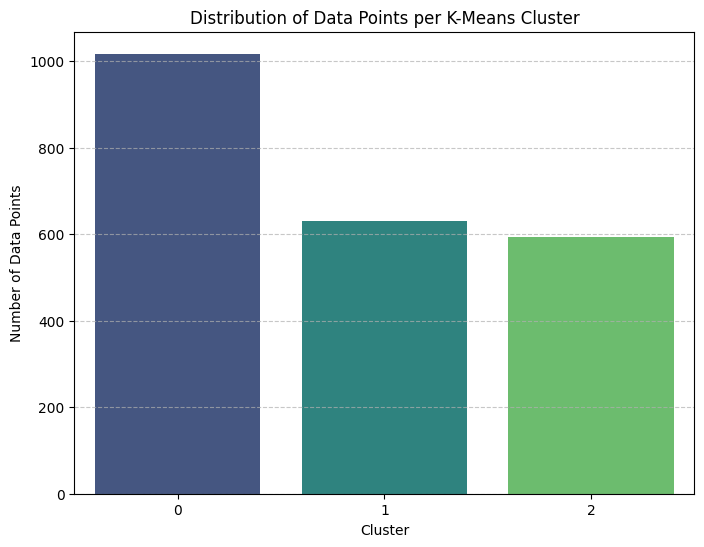

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

cluster_counts = marketing_clean['cluster'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Distribution of Data Points per K-Means Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

CONCLUSION:

We can classify this marketing campaign in 3 different types of customers grouping.

CLUSTER 0

Represents budget-constrained families and low value browsers.
They have more kids at home (both kids and teens).
Education skewed towards graduation/ basic.
Mostly married or together.
Lowest income and spending power.
Fewer purchases overall and store-base purchase
Lowest campaign acceptance and response rate.

CLUSTER 1

Represents mainstream family shoppers and average value.
Highest teenhome with older children.
Education mostly graduation/ PhD.
Mostly married or together.
Slightly older age profile.
Mid-level income with moderate spending across all categories.
Balanced channel usage between store, web and catalog.
Moderate deal purchases as well.
Some campaign acceptance and moderate response rate.

CLUSTER 2


Represents premium loyalists and high value customers.

Few or no children.
Higher share of graduation/ master/ PhD.
Largely married but more singles than other clusters.
Middle-aged group.

Highest income with high spendings in wines, meat, fish, fruits and sweets.
Alot of outliers leaning to heavy spenders.

Most purchases overall wtih strong catalog and store usage.
Fewer web visits.
Less price-sensitive.

Highest acceptance of all campaigns.
Highest response rate and most valuable from a marketing ROI perspective.